**UNEMPLOYMENT ANALYSIS** 

By Shivadharshini G

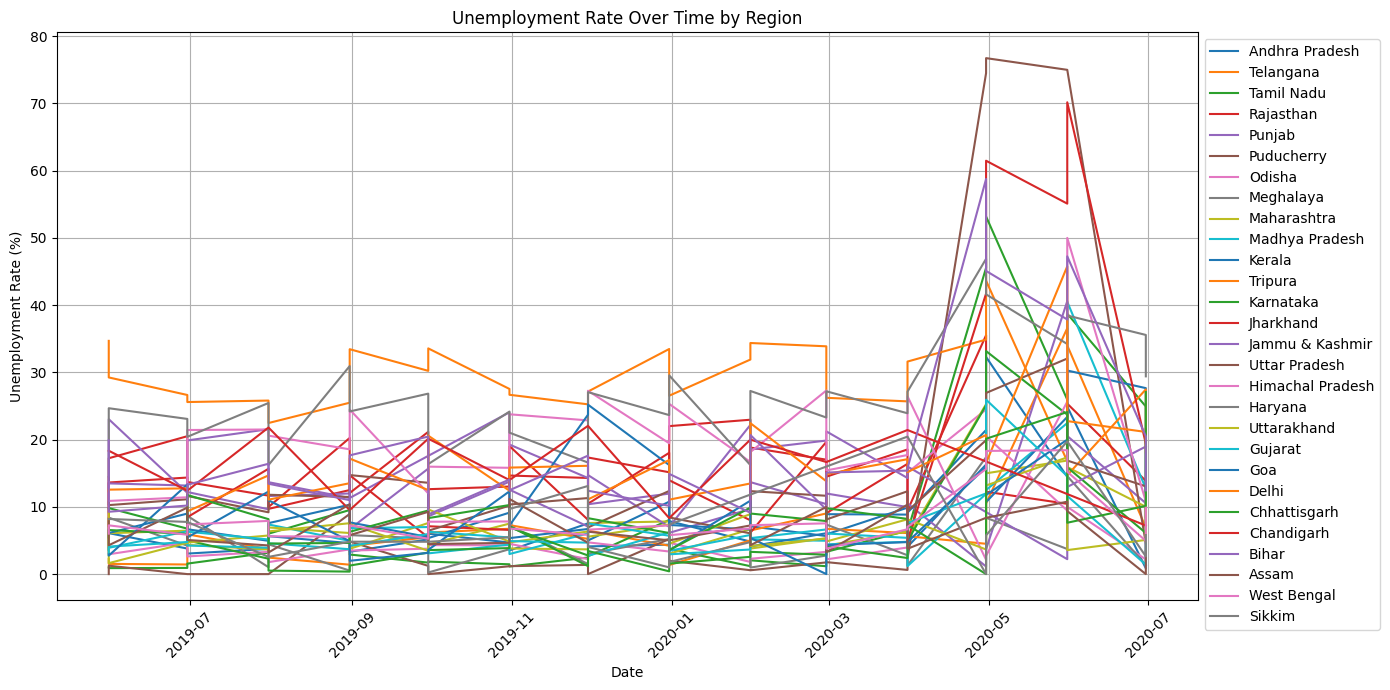

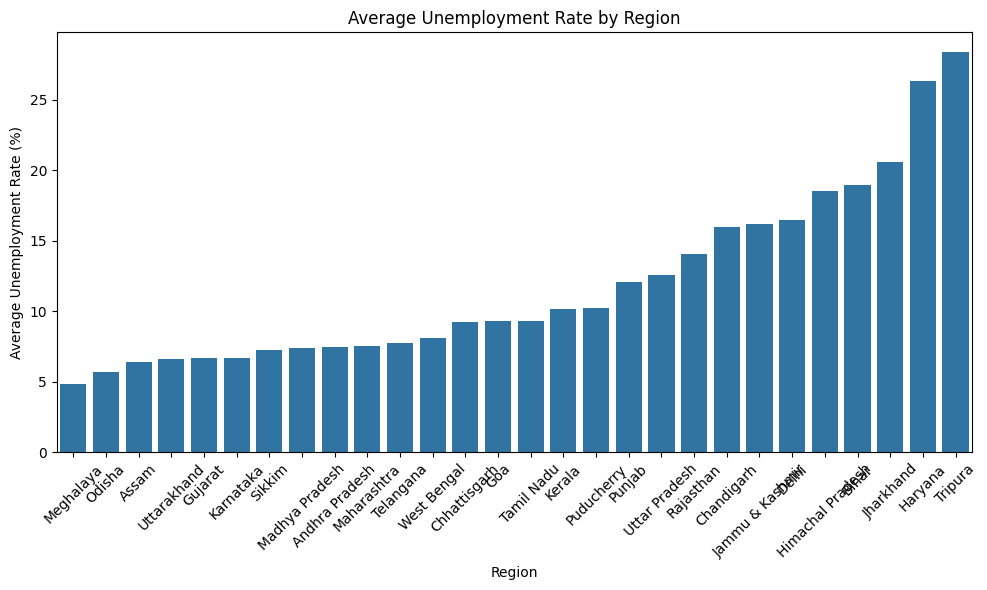

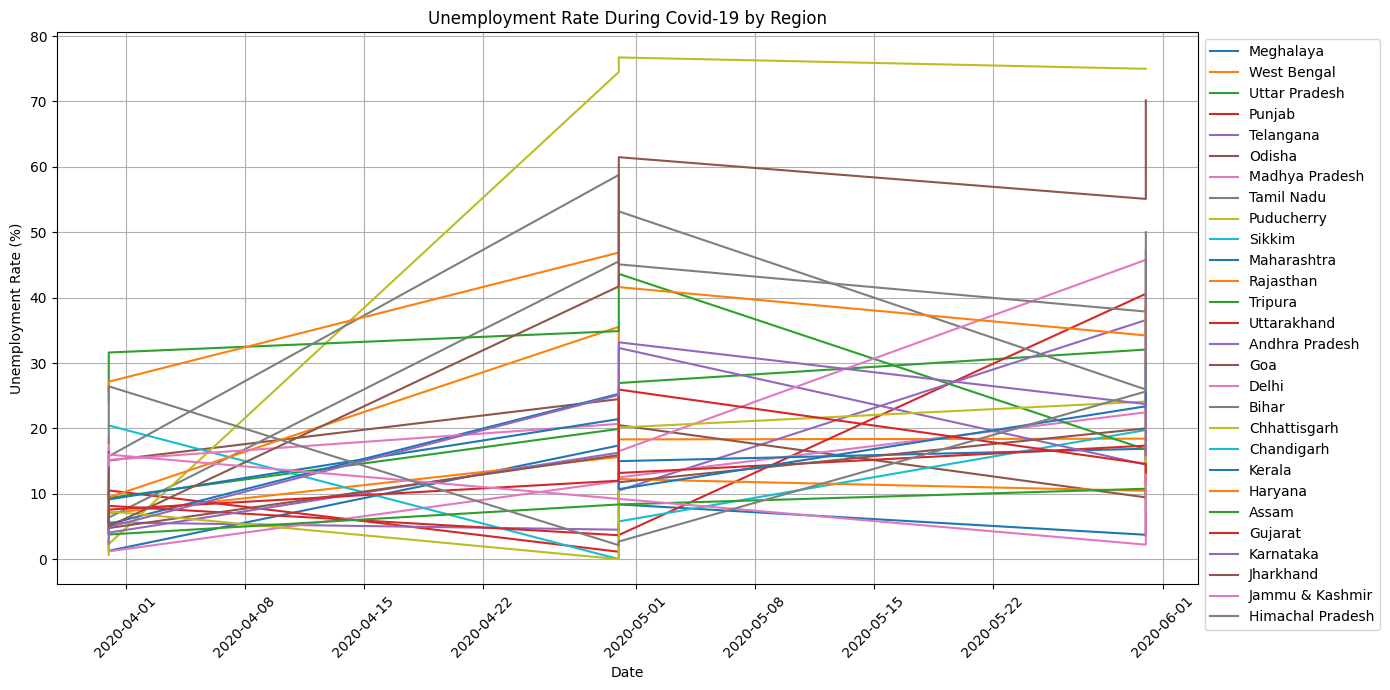

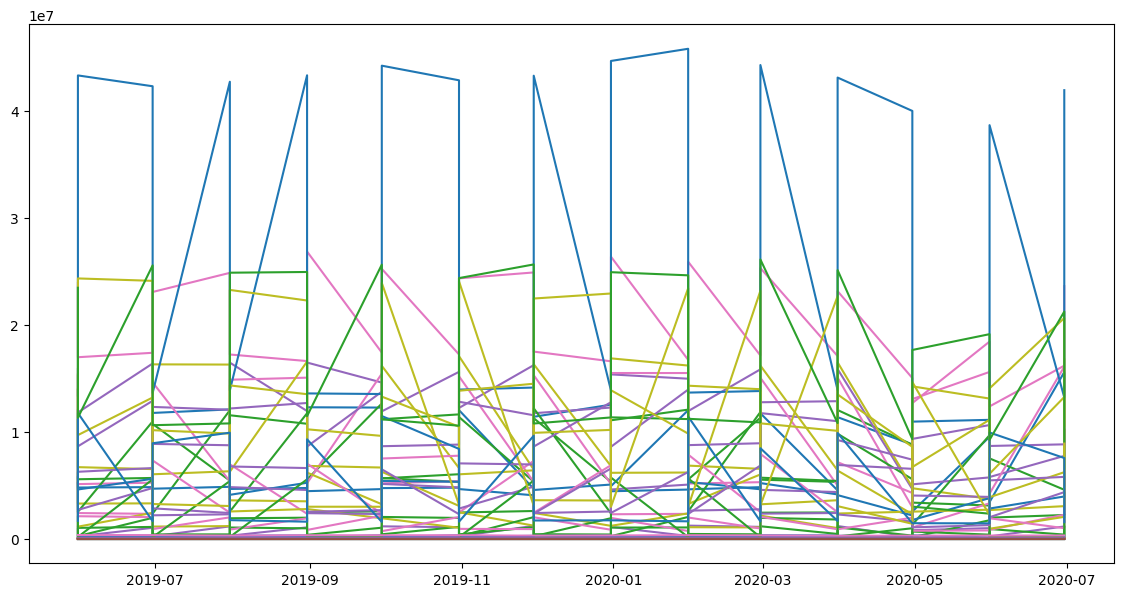

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Unemployment in India.csv')

# Clean the column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# Remove leading/trailing spaces in 'Date' column and convert to datetime format
df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Drop rows where 'Date' could not be parsed
df = df.dropna(subset=['Date'])

# Sort dataframe by date
df = df.sort_values(by='Date')

# Visualization 1: Unemployment Rate Over Time
plt.figure(figsize=(14, 7))
for region in df['Region'].unique():
    subset = df[df['Region'] == region]
    plt.plot(subset['Date'], subset['Estimated Unemployment Rate (%)'], label=region)

plt.title('Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Average Unemployment Rate by Region
plt.figure(figsize=(10, 6))
avg_unemployment_rate = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()
sns.barplot(x=avg_unemployment_rate.index, y=avg_unemployment_rate.values)
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 3: Unemployment Rate During Covid-19
# Assuming Covid-19 period is from March 2020 to May 2020
covid_period = df[(df['Date'] >= '2020-03-01') & (df['Date'] <= '2020-05-31')]

plt.figure(figsize=(14, 7))
for region in covid_period['Region'].unique():
    subset = covid_period[covid_period['Region'] == region]
    plt.plot(subset['Date'], subset['Estimated Unemployment Rate (%)'], label=region)

plt.title('Unemployment Rate During Covid-19 by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 4: Employment Rate and Labour Participation Rate Over Time
plt.figure(figsize=(14, 7))
for region in df['Region'].unique():
    subset = df[df['Region'] == region]
    plt.plot(subset['Date'], subset['Estimated Employed'], label=f'{region} - Employed')
    plt.plot(subset['Date'], subset['Estimated Labour Participation Rate (%)'], label=f'{region} - Labour Participation Rate')




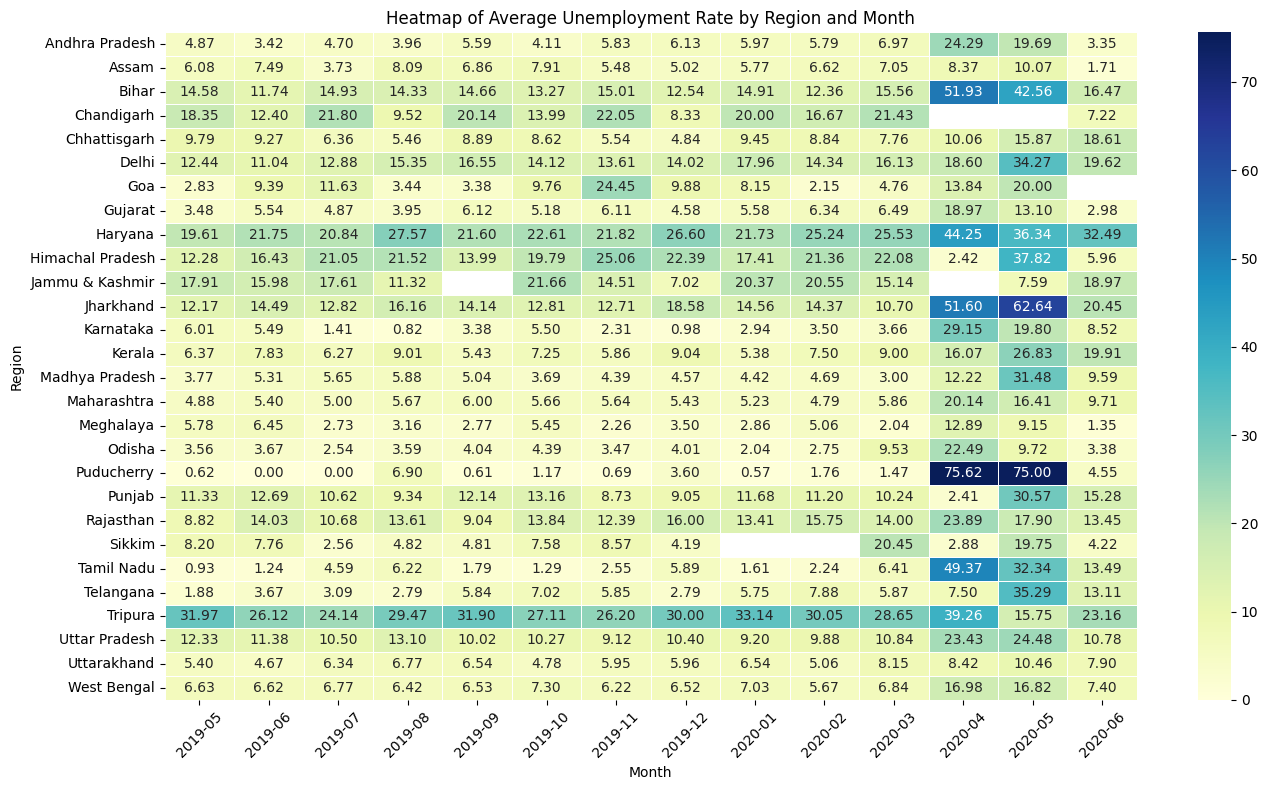

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/Unemployment in India.csv')

# Clean the column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# Remove leading/trailing spaces in 'Date' column and convert to datetime format
df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Drop rows where 'Date' could not be parsed
df = df.dropna(subset=['Date'])

# Extract year and month from 'Date' for aggregation
df['YearMonth'] = df['Date'].dt.to_period('M')

# Calculate average unemployment rate by region and month
pivot_table = df.pivot_table(
    values='Estimated Unemployment Rate (%)',
    index='Region',
    columns='YearMonth',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Average Unemployment Rate by Region and Month')
plt.xlabel('Month')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
